In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "../data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [4]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [5]:
# Fit the model
history = model.fit(
    X_train, y_train_30d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 1s 39us/step - loss: 0.6944 - acc: 0.5121 - val_loss: 0.6931 - val_acc: 0.5260
Epoch 2/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6931 - acc: 0.5148 - val_loss: 0.6915 - val_acc: 0.5260
Epoch 3/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6893 - acc: 0.5148 - val_loss: 0.6862 - val_acc: 0.5260
Epoch 4/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6836 - acc: 0.5276 - val_loss: 0.6831 - val_acc: 0.5859
Epoch 5/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6805 - acc: 0.5752 - val_loss: 0.6809 - val_acc: 0.5958
Epoch 6/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6773 - acc: 0.5928 - val_loss: 0.6784 - val_acc: 0.6021
Epoch 7/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6745 - acc: 0.5998 - val_loss: 0.6

27584/27584 [==============================] - 0s 12us/step - loss: 0.6443 - acc: 0.6259 - val_loss: 0.6537 - val_acc: 0.6000
Epoch 60/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6442 - acc: 0.6257 - val_loss: 0.6538 - val_acc: 0.5988
Epoch 61/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6441 - acc: 0.6253 - val_loss: 0.6530 - val_acc: 0.6016
Epoch 62/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6440 - acc: 0.6267 - val_loss: 0.6526 - val_acc: 0.6027
Epoch 63/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6440 - acc: 0.6262 - val_loss: 0.6529 - val_acc: 0.6016
Epoch 64/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6438 - acc: 0.6284 - val_loss: 0.6523 - val_acc: 0.6032
Epoch 65/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6438 - acc: 0.6273 - val_loss: 0.6538 - val_acc: 0.5972
Epoch 66/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 12us/step - loss: 0.6413 - acc: 0.6272 - val_loss: 0.6509 - val_acc: 0.5961
Epoch 118/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6413 - acc: 0.6266 - val_loss: 0.6513 - val_acc: 0.5975
Epoch 119/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6412 - acc: 0.6282 - val_loss: 0.6510 - val_acc: 0.5953
Epoch 120/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6413 - acc: 0.6271 - val_loss: 0.6503 - val_acc: 0.6001
Epoch 121/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6413 - acc: 0.6276 - val_loss: 0.6505 - val_acc: 0.5978
Epoch 122/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6412 - acc: 0.6279 - val_loss: 0.6503 - val_acc: 0.5994
Epoch 123/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6412 - acc: 0.6276 - val_loss: 0.6510 - val_acc: 0.5974
Epoch 124/1000
27584/27584 [

27584/27584 [==============================] - 0s 17us/step - loss: 0.6405 - acc: 0.6274 - val_loss: 0.6501 - val_acc: 0.5992
Epoch 176/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6404 - acc: 0.6278 - val_loss: 0.6499 - val_acc: 0.5981
Epoch 177/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6404 - acc: 0.6290 - val_loss: 0.6507 - val_acc: 0.6021
Epoch 178/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6404 - acc: 0.6286 - val_loss: 0.6501 - val_acc: 0.5992
Epoch 179/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6404 - acc: 0.6286 - val_loss: 0.6504 - val_acc: 0.6021
Epoch 180/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6403 - acc: 0.6290 - val_loss: 0.6504 - val_acc: 0.6014
Epoch 181/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6403 - acc: 0.6287 - val_loss: 0.6504 - val_acc: 0.6027
Epoch 182/1000
27584/27584 [

27584/27584 [==============================] - 0s 14us/step - loss: 0.6400 - acc: 0.6275 - val_loss: 0.6503 - val_acc: 0.6042
Epoch 234/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6399 - acc: 0.6294 - val_loss: 0.6502 - val_acc: 0.6032
Epoch 235/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6399 - acc: 0.6276 - val_loss: 0.6503 - val_acc: 0.6046
Epoch 236/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6399 - acc: 0.6284 - val_loss: 0.6511 - val_acc: 0.5982
Epoch 237/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6399 - acc: 0.6284 - val_loss: 0.6501 - val_acc: 0.6000
Epoch 238/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6399 - acc: 0.6286 - val_loss: 0.6518 - val_acc: 0.5910
Epoch 239/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6399 - acc: 0.6286 - val_loss: 0.6504 - val_acc: 0.6046
Epoch 240/1000
27584/27584 [

27584/27584 [==============================] - 0s 16us/step - loss: 0.6397 - acc: 0.6288 - val_loss: 0.6513 - val_acc: 0.5950
Epoch 292/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6396 - acc: 0.6288 - val_loss: 0.6504 - val_acc: 0.6017
Epoch 293/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6396 - acc: 0.6276 - val_loss: 0.6536 - val_acc: 0.5869
Epoch 294/1000
27584/27584 [==============================] - 1s 20us/step - loss: 0.6397 - acc: 0.6276 - val_loss: 0.6506 - val_acc: 0.6046
Epoch 295/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6397 - acc: 0.6280 - val_loss: 0.6504 - val_acc: 0.6045
Epoch 296/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6397 - acc: 0.6283 - val_loss: 0.6502 - val_acc: 0.6006
Epoch 297/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6397 - acc: 0.6279 - val_loss: 0.6511 - val_acc: 0.6030
Epoch 298/1000
27584/27584 [

27584/27584 [==============================] - 1s 19us/step - loss: 0.6394 - acc: 0.6294 - val_loss: 0.6501 - val_acc: 0.6010
Epoch 350/1000
27584/27584 [==============================] - 1s 25us/step - loss: 0.6394 - acc: 0.6287 - val_loss: 0.6497 - val_acc: 0.6019
Epoch 351/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6393 - acc: 0.6286 - val_loss: 0.6492 - val_acc: 0.6033
Epoch 352/1000
27584/27584 [==============================] - 1s 23us/step - loss: 0.6394 - acc: 0.6287 - val_loss: 0.6499 - val_acc: 0.6007
Epoch 353/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6394 - acc: 0.6284 - val_loss: 0.6505 - val_acc: 0.6039
Epoch 354/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6394 - acc: 0.6282 - val_loss: 0.6501 - val_acc: 0.6001
Epoch 355/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6394 - acc: 0.6293 - val_loss: 0.6507 - val_acc: 0.6059
Epoch 356/1000
27584/27584 [

27584/27584 [==============================] - 0s 14us/step - loss: 0.6392 - acc: 0.6284 - val_loss: 0.6511 - val_acc: 0.5987
Epoch 408/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6392 - acc: 0.6284 - val_loss: 0.6506 - val_acc: 0.6037
Epoch 409/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6392 - acc: 0.6282 - val_loss: 0.6507 - val_acc: 0.6052
Epoch 410/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6392 - acc: 0.6291 - val_loss: 0.6499 - val_acc: 0.6036
Epoch 411/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6392 - acc: 0.6289 - val_loss: 0.6507 - val_acc: 0.6017
Epoch 412/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6392 - acc: 0.6280 - val_loss: 0.6495 - val_acc: 0.6049
Epoch 413/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6392 - acc: 0.6290 - val_loss: 0.6500 - val_acc: 0.6021
Epoch 414/1000
27584/27584 [

27584/27584 [==============================] - 0s 17us/step - loss: 0.6390 - acc: 0.6282 - val_loss: 0.6504 - val_acc: 0.6032
Epoch 466/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6390 - acc: 0.6299 - val_loss: 0.6503 - val_acc: 0.6032
Epoch 467/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6389 - acc: 0.6288 - val_loss: 0.6502 - val_acc: 0.6042
Epoch 468/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6390 - acc: 0.6292 - val_loss: 0.6501 - val_acc: 0.5998
Epoch 469/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6389 - acc: 0.6293 - val_loss: 0.6521 - val_acc: 0.5887
Epoch 470/1000
27584/27584 [==============================] - 0s 17us/step - loss: 0.6390 - acc: 0.6300 - val_loss: 0.6508 - val_acc: 0.6003
Epoch 471/1000
27584/27584 [==============================] - 0s 18us/step - loss: 0.6389 - acc: 0.6298 - val_loss: 0.6487 - val_acc: 0.6065
Epoch 472/1000
27584/27584 [

27584/27584 [==============================] - 0s 14us/step - loss: 0.6388 - acc: 0.6297 - val_loss: 0.6514 - val_acc: 0.5943
Epoch 524/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6388 - acc: 0.6289 - val_loss: 0.6503 - val_acc: 0.6074
Epoch 525/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6388 - acc: 0.6291 - val_loss: 0.6491 - val_acc: 0.6062
Epoch 526/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6388 - acc: 0.6295 - val_loss: 0.6500 - val_acc: 0.6077
Epoch 527/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6388 - acc: 0.6297 - val_loss: 0.6507 - val_acc: 0.5961
Epoch 528/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6388 - acc: 0.6299 - val_loss: 0.6502 - val_acc: 0.6069
Epoch 529/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6388 - acc: 0.6288 - val_loss: 0.6504 - val_acc: 0.6024
Epoch 530/1000
27584/27584 [

27584/27584 [==============================] - 0s 16us/step - loss: 0.6387 - acc: 0.6301 - val_loss: 0.6505 - val_acc: 0.6019
Epoch 582/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6386 - acc: 0.6304 - val_loss: 0.6491 - val_acc: 0.6071
Epoch 583/1000
27584/27584 [==============================] - 0s 12us/step - loss: 0.6386 - acc: 0.6301 - val_loss: 0.6494 - val_acc: 0.6016
Epoch 584/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6387 - acc: 0.6292 - val_loss: 0.6506 - val_acc: 0.6048
Epoch 585/1000
27584/27584 [==============================] - 1s 21us/step - loss: 0.6387 - acc: 0.6305 - val_loss: 0.6511 - val_acc: 0.5959
Epoch 586/1000
27584/27584 [==============================] - 1s 18us/step - loss: 0.6387 - acc: 0.6300 - val_loss: 0.6512 - val_acc: 0.5949
Epoch 587/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6386 - acc: 0.6296 - val_loss: 0.6514 - val_acc: 0.5929
Epoch 588/1000
27584/27584 [

27584/27584 [==============================] - 1s 19us/step - loss: 0.6386 - acc: 0.6300 - val_loss: 0.6508 - val_acc: 0.5995
Epoch 640/1000
27584/27584 [==============================] - 0s 14us/step - loss: 0.6385 - acc: 0.6308 - val_loss: 0.6504 - val_acc: 0.6024
Epoch 641/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6385 - acc: 0.6300 - val_loss: 0.6492 - val_acc: 0.6066
Epoch 642/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6386 - acc: 0.6294 - val_loss: 0.6500 - val_acc: 0.6095
Epoch 643/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6385 - acc: 0.6308 - val_loss: 0.6493 - val_acc: 0.6036
Epoch 644/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6385 - acc: 0.6301 - val_loss: 0.6502 - val_acc: 0.6079
Epoch 645/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6385 - acc: 0.6295 - val_loss: 0.6502 - val_acc: 0.6079
Epoch 646/1000
27584/27584 [

27584/27584 [==============================] - 0s 12us/step - loss: 0.6384 - acc: 0.6293 - val_loss: 0.6513 - val_acc: 0.5921
Epoch 698/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6384 - acc: 0.6298 - val_loss: 0.6499 - val_acc: 0.6082
Epoch 699/1000
27584/27584 [==============================] - 0s 11us/step - loss: 0.6384 - acc: 0.6297 - val_loss: 0.6503 - val_acc: 0.6036
Epoch 700/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6384 - acc: 0.6304 - val_loss: 0.6504 - val_acc: 0.6069
Epoch 701/1000
27584/27584 [==============================] - 1s 19us/step - loss: 0.6384 - acc: 0.6300 - val_loss: 0.6501 - val_acc: 0.6085
Epoch 702/1000
27584/27584 [==============================] - 0s 16us/step - loss: 0.6383 - acc: 0.6300 - val_loss: 0.6504 - val_acc: 0.6021
Epoch 703/1000
27584/27584 [==============================] - 0s 15us/step - loss: 0.6384 - acc: 0.6300 - val_loss: 0.6499 - val_acc: 0.6075
Epoch 704/1000
27584/27584 [

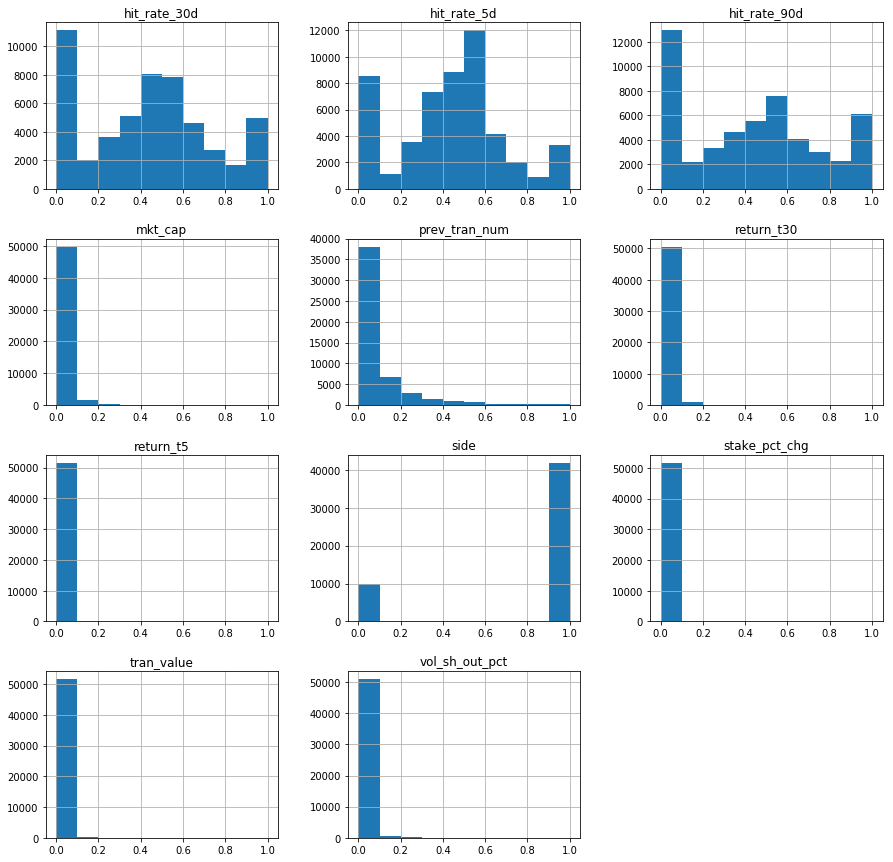

In [6]:
df[col_list].hist(figsize = [15,15])

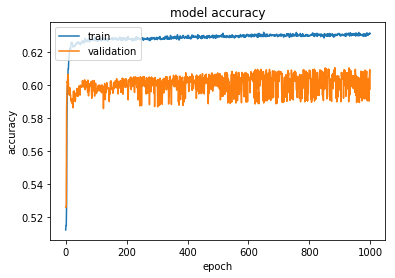

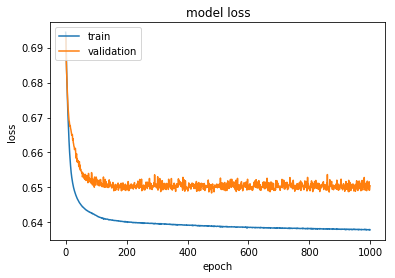

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
# evaluate the model
scores = model.evaluate(X_train, y_train_30d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_30d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 2s 57us/step
[Train] acc: 62.39%
17240/17240 [==============================] - 1s 53us/step
[Test] acc: 60.06%
